In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from matplotlib.colors import ListedColormap
from mlx_lm import load, generate

/var/folders/6l/rd9mz6093d1688p05vb4jvk80000gn/T/ipykernel_62327/3152665539.py:2: DtypeWarning: Columns (7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  coral_data = pd.read_csv('deep_sea_corals.csv', usecols=['latitude', 'longitude', 'DepthInMeters'])


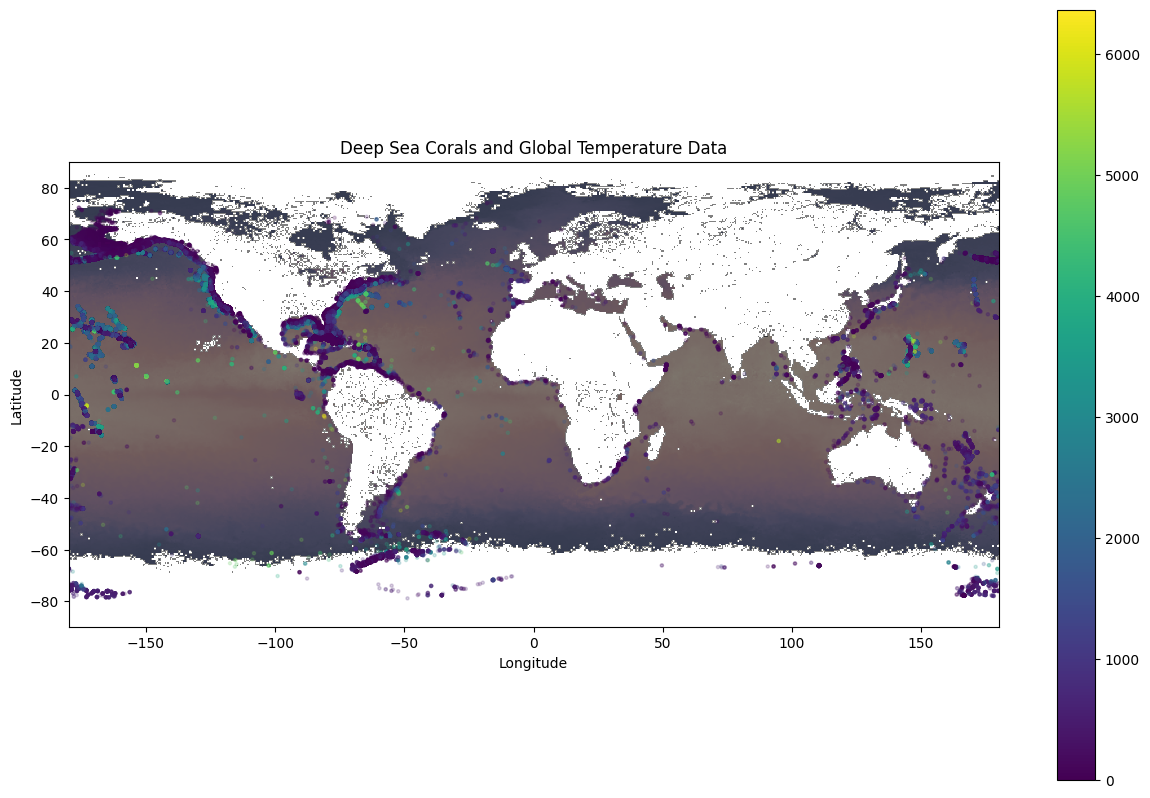

In [92]:
# Load the coral data
coral_data = pd.read_csv('deep_sea_corals.csv', usecols=['latitude', 'longitude', 'DepthInMeters'])

# Drop the first row as requested
coral_data = coral_data.drop(0)

# Ensure the columns are the correct dtype
coral_data['latitude'] = pd.to_numeric(coral_data['latitude'], errors='coerce')
coral_data['longitude'] = pd.to_numeric(coral_data['longitude'], errors='coerce')
coral_data['DepthInMeters'] = pd.to_numeric(coral_data['DepthInMeters'], errors='coerce')

# Drop rows with invalid data
coral_data = coral_data.dropna(subset=['latitude', 'longitude', 'DepthInMeters'])

# Create a GeoDataFrame for coral data
coral_gdf = gpd.GeoDataFrame(coral_data, geometry=gpd.points_from_xy(coral_data.longitude, coral_data.latitude))

# Load the temperature data without headers
temperature_data = pd.read_csv('temperature.CSV', header=None)

# Load the custom colormap from the .act file
def read_act_file(file_path):
    with open(file_path, 'rb') as f:
        colors = np.frombuffer(f.read(), dtype=np.uint8)
    colors = colors.reshape((-1, 3)) / 255.0  # Normalize the colors
    return ListedColormap(colors)

custom_cmap = read_act_file('sst_35.act')

# Replace 99999.0 with NaN
temperature_data.replace(99999.0, np.nan, inplace=True)

# Plot the temperature data as a heatmap using the custom colormap
fig, ax = plt.subplots(figsize=(15, 10))
plt.imshow(temperature_data, cmap=custom_cmap, alpha=0.6, extent=[-180, 180, -90, 90])

# Overlay a mask for 99999 values as black
temperature_data_masked = temperature_data.copy()
temperature_data_masked.replace(np.nan, 0, inplace=True)  # Temporary replacement to handle mask overlay

# Create a mask where NaN values will be plotted as black
mask = np.isnan(temperature_data)

# Apply the mask
ax.imshow(mask, cmap='gray', interpolation='none', alpha=0.5, extent=[-180, 180, -90, 90])

# Plot the coral GeoDataFrame with color based on depth
coral_gdf.plot(ax=ax, column='DepthInMeters', cmap='viridis', markersize=5, alpha=0.6, legend=True)

plt.title('Deep Sea Corals and Global Temperature Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
# Count the number of rows in data/its_over.jsonl
n = 0
with open('data/its_over.jsonl') as f:
    for _ in f:
        n += 1

# Split the json data into train test val
train = df.iloc[:int(1*n)]
test = df.iloc[int(0.8*n):int(0.9*n)]
val = df.iloc[int(0.9*n):]

# Save the train test val to their respective files as jsonl
train.to_json('data/train.jsonl', orient='records', lines=True)
test.to_json('data/test.jsonl', orient='records', lines=True)
val.to_json('data/val.jsonl', orient='records', lines=True)

In [ ]:
from mlx_lm import load, generate

model, tokenizer = load("mlx-community/Meta-Llama-3-8B-Instruct-4bit")

In [ ]:
response = generate(model, tokenizer, prompt="")

In [ ]:
print(response)

In [ ]:
python3 lora.py \
   --model meta-llama/Llama-3-7b-hf \
   --train \
   --batch-size 1 \
   --lora-layers 4